# BusinessCase : LoanTap - Logistic Regression

### OverView of LoanTap:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

DataLink:
    
    https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view

Data Dictionary:
    
    loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    term : The number of payments on the loan. Values are in months and can be either 36 or 60.
    int_rate : Interest Rate on the loan
    installment : The monthly payment owed by the borrower if the loan originates.
    grade : LoanTap assigned loan grade
    sub_grade : LoanTap assigned loan subgrade
    emp_title :The job title supplied by the Borrower when applying for the loan.*
    emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
    home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
    annual_inc : The self-reported annual income provided by the borrower during registration.
    verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
    issue_d : The month which the loan was funded
    loan_status : Current status of the loan - Target Variable
    purpose : A category provided by the borrower for the loan request.
    title : The loan title provided by the borrower
    dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
    earliest_cr_line :The month the borrower's earliest reported credit line was opened
    open_acc : The number of open credit lines in the borrower's credit file.
    pub_rec : Number of derogatory public records
    revol_bal : Total credit revolving balance
    revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
    total_acc : The total number of credit lines currently in the borrower's credit file
    initial_list_status : The initial listing status of the loan. Possible values are – W, F
    application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
    mort_acc : Number of mortgage accounts.
    pub_rec_bankruptcies : Number of public record bankruptcies
    Address: Address of the individual

### Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. 
If so, what should the repayment terms be in business recommendations?

In [65]:
#Data processing
import numpy as np
import pandas as pd

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Stats & model building
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Hide warnings
import warnings
warnings.filterwarnings("ignore")

### Loading LoanTap data

In [4]:
#Loading LoanTap data
data = pd.read_csv('logistic_regression.csv')

In [5]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
data.shape

(396030, 27)

Insights: There are 3.96L datapoints with 27 features in the LoanTap dataset among which 'loan_status' is the Target column.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### Checking for null values and filling with their respective appropriates

In [8]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Insigths: 
    
    There are null values observed in the data 6 columns. 
    
    - Out of which 3 are categorical columns and 3 are numerical columns.
    - Null values of Categorical columns 'emp_title','emp_length','title' can be replaced by their respective modes.
    - Null values of Nunerical columns 'revol_util','mort_acc','pub_rec_bankruptcies' can be replaced by their respective means.

In [9]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
data.fillna(value=fill_values, inplace=True)

In [10]:
#Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = data.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [11]:
data['mort_acc'] = data.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().sum().sum()

0

Insights: Data is free of null values and read to analyze.

## Exploratory Data Analysis

### Splitting features based on Categorical and Numerical values

In [14]:
cols = data.columns
print(cols)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


In [15]:
col_dtypes = data.dtypes
col_dtypes = col_dtypes.reset_index()
col_dtypes

,index,0
0,loan_amnt,float64
1,term,object
2,int_rate,float64
3,installment,float64
4,grade,object
5,sub_grade,object
6,emp_title,object
7,emp_length,object
8,home_ownership,object
9,annual_inc,float64


In [16]:
cat_cols=list(col_dtypes[col_dtypes[0]=='object']['index'])
num_cols= list(col_dtypes[col_dtypes[0]=='float']['index'])

In [17]:
print(f"{len(cat_cols)} Categorical Columns:\n\n",cat_cols)

15 Categorical Columns:

 ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [18]:
print(f"{len(num_cols)} Numerical Columns:\n\n",num_cols)

12 Numerical Columns:

 ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


### Value counts of each feature

In [19]:
data[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,376929.0,14264.626826,8374.474814,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,376929.0,13.637716,4.475179,5.32,10.49,13.33,16.49,30.99
installment,376929.0,435.874478,251.195910,16.08,254.12,379.63,572.98,1533.81
annual_inc,376929.0,75397.440575,62240.311742,4000.00,46000.00,65000.00,90000.00,8706582.00
dti,376929.0,17.296733,8.111768,0.00,11.27,16.85,22.89,380.53
open_acc,376929.0,11.374460,5.144134,1.00,8.00,11.00,14.00,90.00
pub_rec,376929.0,0.172603,0.524977,0.00,0.00,0.00,0.00,86.00
revol_bal,376929.0,15979.636046,20683.822466,0.00,6106.00,11303.00,19785.00,1743266.00
revol_util,376929.0,53.961622,24.420020,0.00,36.10,55.00,73.00,892.30
total_acc,376929.0,25.482693,11.884231,2.00,17.00,24.00,32.00,151.00


Insights:
    
    - Maximum amount applied for loan is 4000 and minimum is 500. 
    - Maximum number of pu_rec_bankruptcies are 8 and minimum is 0.
    - Maximum total number of credit lines currently in the borrower's credit file(total_acc) are 151 
      and minimum are 2.
    - Maximum installment rate is 30.99 and minimum is 5.32.
    - Maximum number of pub_rec(Number of derogatory public records) are 86 and minimum are 0.
    - Maximum no of mortgage accounts are 34 and minimum are 0. 

In [20]:
for col in cat_cols:
    print(f'"{col}" has {data[col].nunique()} unique values',':\n', data[col].unique(),'\n','-'*25)

"term" has 2 unique values :
 [' 36 months' ' 60 months'] 
 -------------------------
"grade" has 7 unique values :
 ['B' 'A' 'C' 'E' 'D' 'F' 'G'] 
 -------------------------
"sub_grade" has 35 unique values :
 ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3'] 
 -------------------------
"emp_title" has 172567 unique values :
 ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc'] 
 -------------------------
"emp_length" has 11 unique values :
 ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year'] 
 -------------------------
"home_ownership" has 6 unique values :
 ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE'] 
 -------------------------
"verification_status" has 3 unique values :
 ['Not Verified' 'Source Verified' 'Verified'] 
 ------

### UNIVARIATE ANALYSIS

### Selecting Categorical columns based on no of categories

In [21]:
# selected category cols
sel_cat_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']

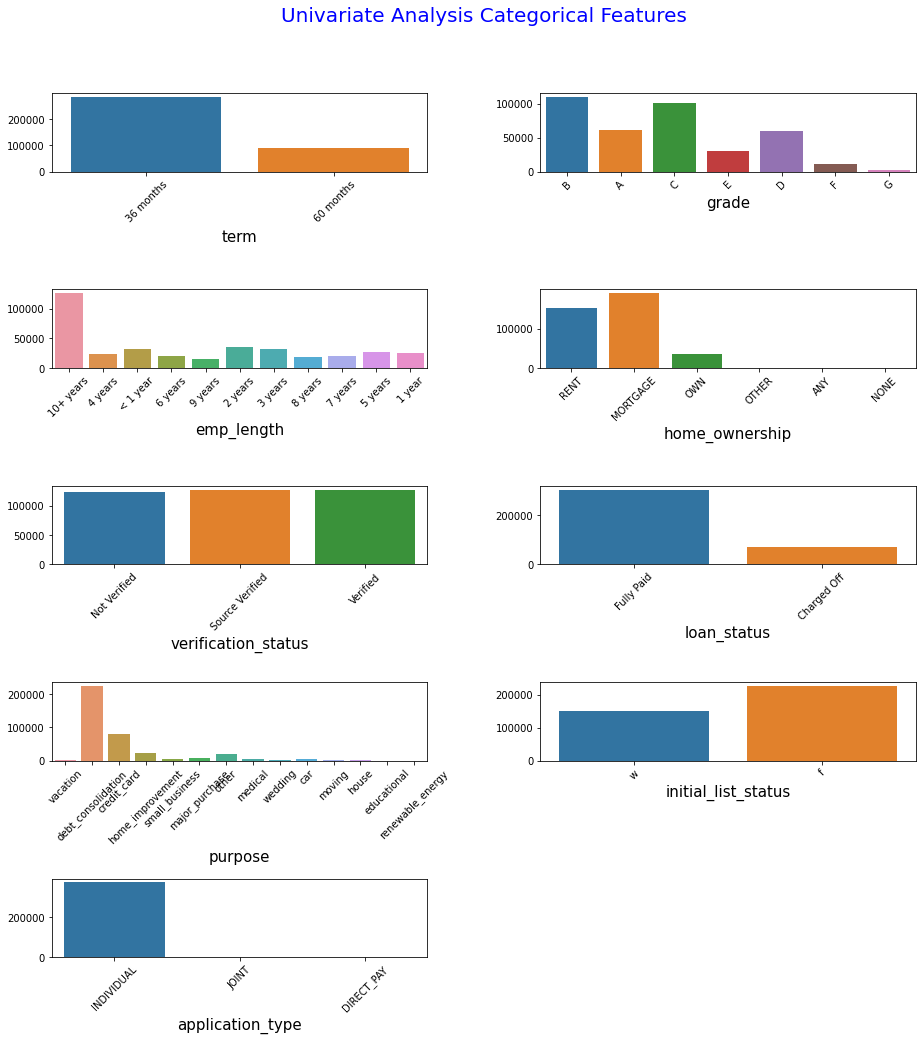

In [22]:
#univariate analysis on categorical features
fig = plt.figure(figsize=(15,15))
for n,col in enumerate(sel_cat_cols):
    
    plt.subplot(int(len(sel_cat_cols)/2 +1), 2, n+1)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=1.5)
    #plt.pie(list(data[col].value_counts().values),labels = list(data[col].value_counts().index), startangle = 90)
    sns.countplot(x = data[col], dodge='False')
    #plt.title(col, fontsize = 15)
    plt.xticks(rotation = 45)
    plt.xlabel(col, color='black', fontsize='15')
    plt.ylabel('')
fig.suptitle("Univariate Analysis Categorical Features", fontsize= 20, color = 'blue')
plt.show()

Insights:
    
    - Maximum no of customers applyed for loan took term as '30 months' than '60 months'.
    - Customers with grade B are more followed by 'C','A','D' and 'E'.
    - More no of customers who applied for loan are with >10 years emp_length(experience of employee).
    - Maximum customers have their home on motgage, followed by rented home and then own house.
    - Maximum number of customers had their income verified by LoanTap.
    - 80% of the customers have fully paid their loan and 20% didnt.
    - Maximum of the customers took the loan for vacation purpose.
    - The initial listing status of the loan is 'w' for maximum number of customers.
    - Maximum number of customers applied for loan individually ie.application_type is 'INIDVIDUAL' .

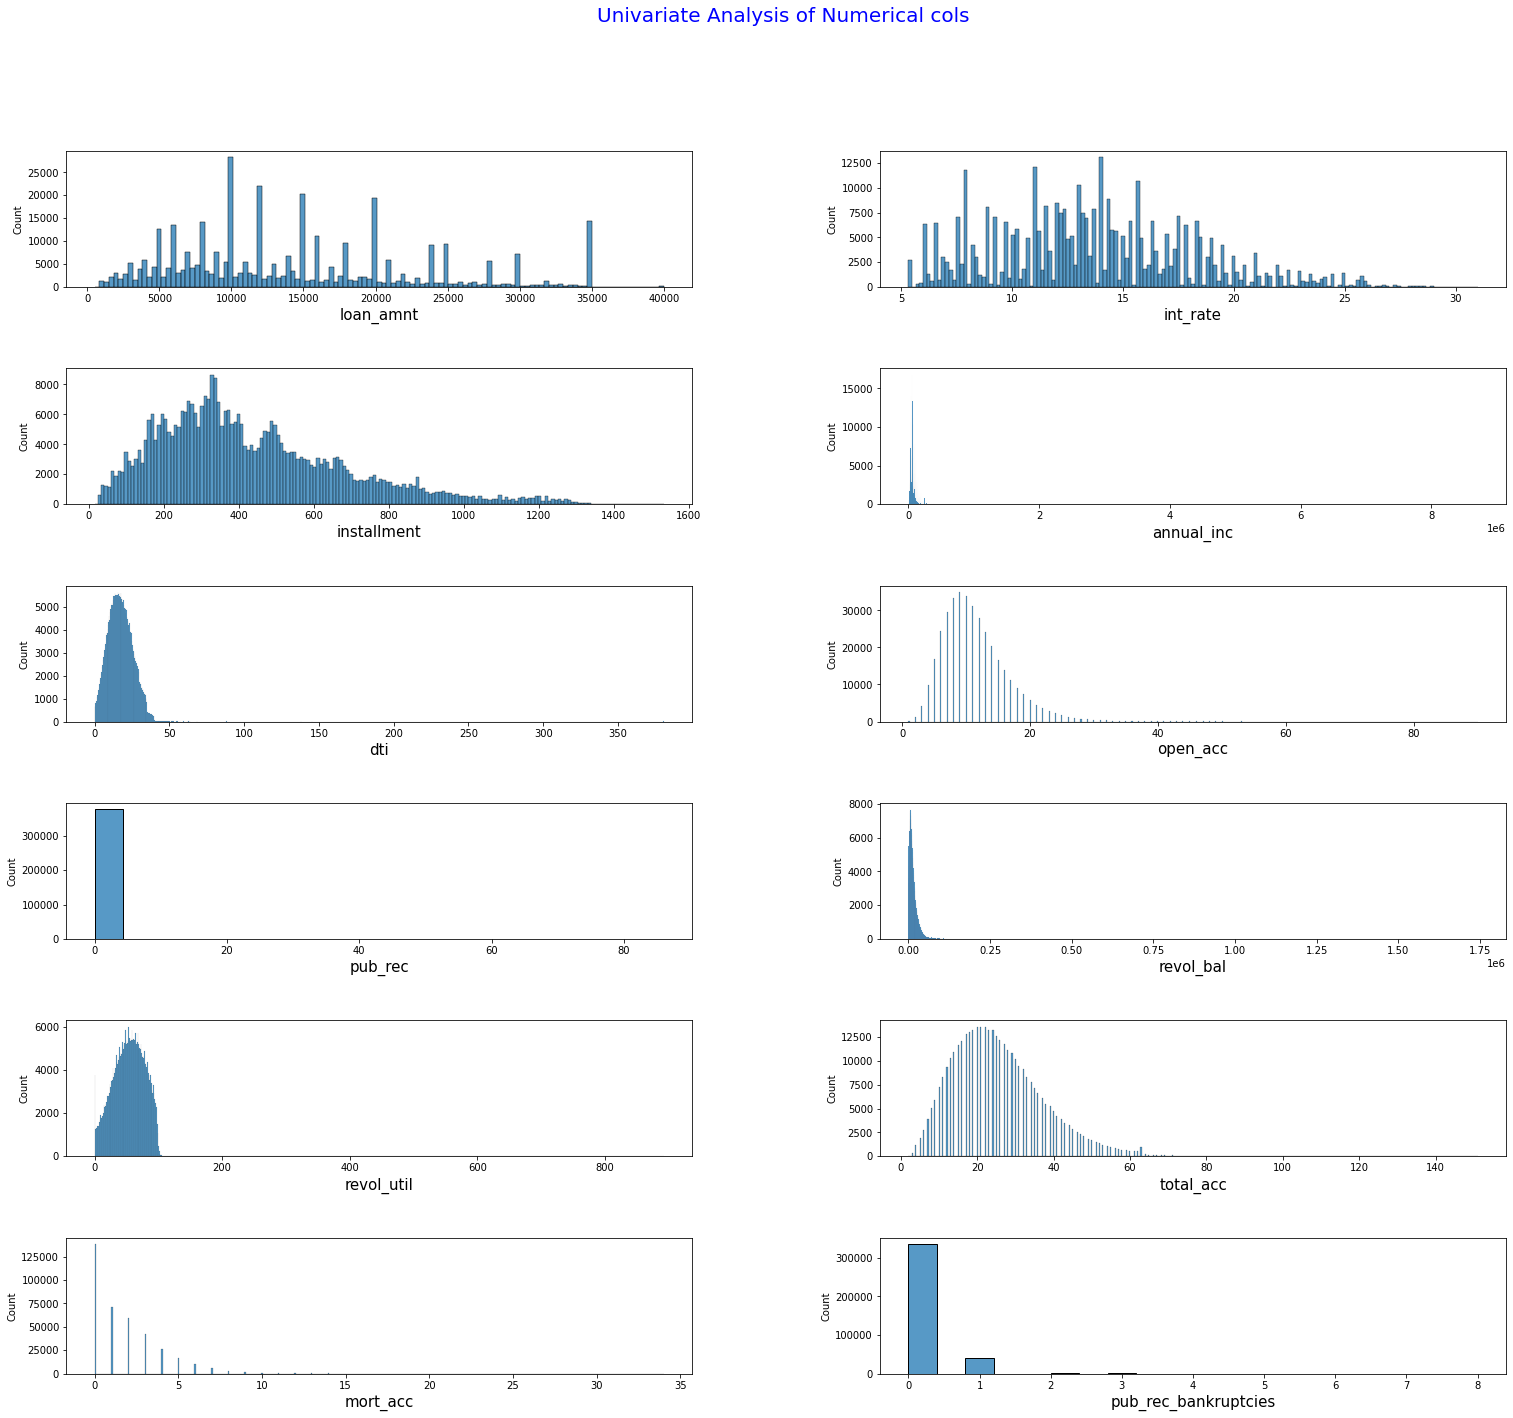

In [23]:
#univariate analysis on numerical features
fig = plt.figure(figsize=(25,25))
for i,col in enumerate(num_cols):
    plt.subplot(int(len(num_cols)/2 +1), 2, i+1)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.6)
    sns.histplot(x=data[col] )
    plt.xlabel(col,fontsize =15)
    #plt.ylabel("count of bikes", fontsize = 15, color = 'blue')
fig.suptitle("Univariate Analysis of Numerical cols ", fontsize= 20, color = 'blue')
plt.show()

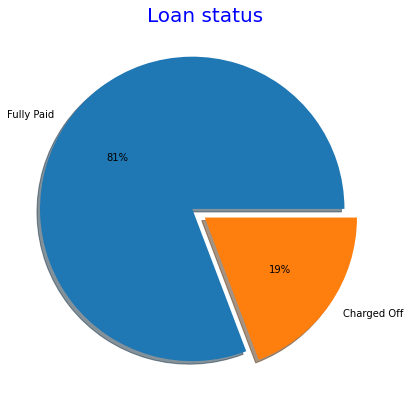

In [24]:
#pie chart for loan_status
fig = plt.figure(figsize=(10,7))
plt.pie(list(data['loan_status'].value_counts().values),labels = list(data['loan_status'].value_counts().index),
        autopct='%.0f%%', explode = [0.1, 0], shadow = True)
plt.title('Loan status', fontsize='20', color='blue')
plt.show()


Insights:
    
    81% of customers fully paid the loan. 19% chargerd off.

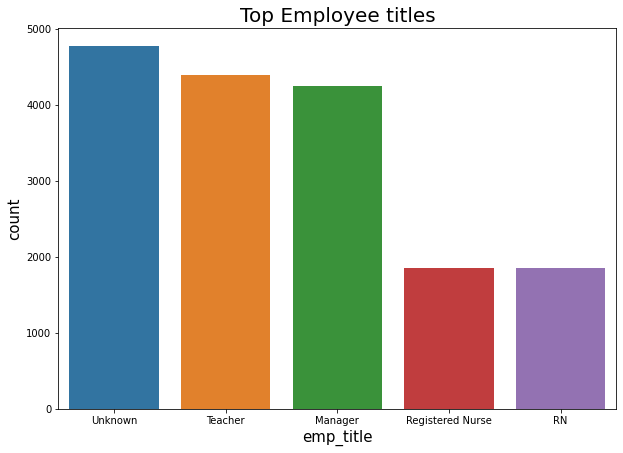

In [25]:
#top 5 employee titles of customers
fig = plt.figure(figsize=(10,7))
sns.barplot(x= data['emp_title'].value_counts()[:5].index, y = data['emp_title'].value_counts()[:5].values)
plt.xlabel('emp_title', fontsize= 15, color = 'black')
plt.ylabel("count",fontsize= 15, color = 'black')
plt.title('Top Employee titles', fontsize='20', color='black')
plt.show()


Insights:
    
    Teacher and Manager are top 2 employee titles.

### BIVARIATE ANALYSIS

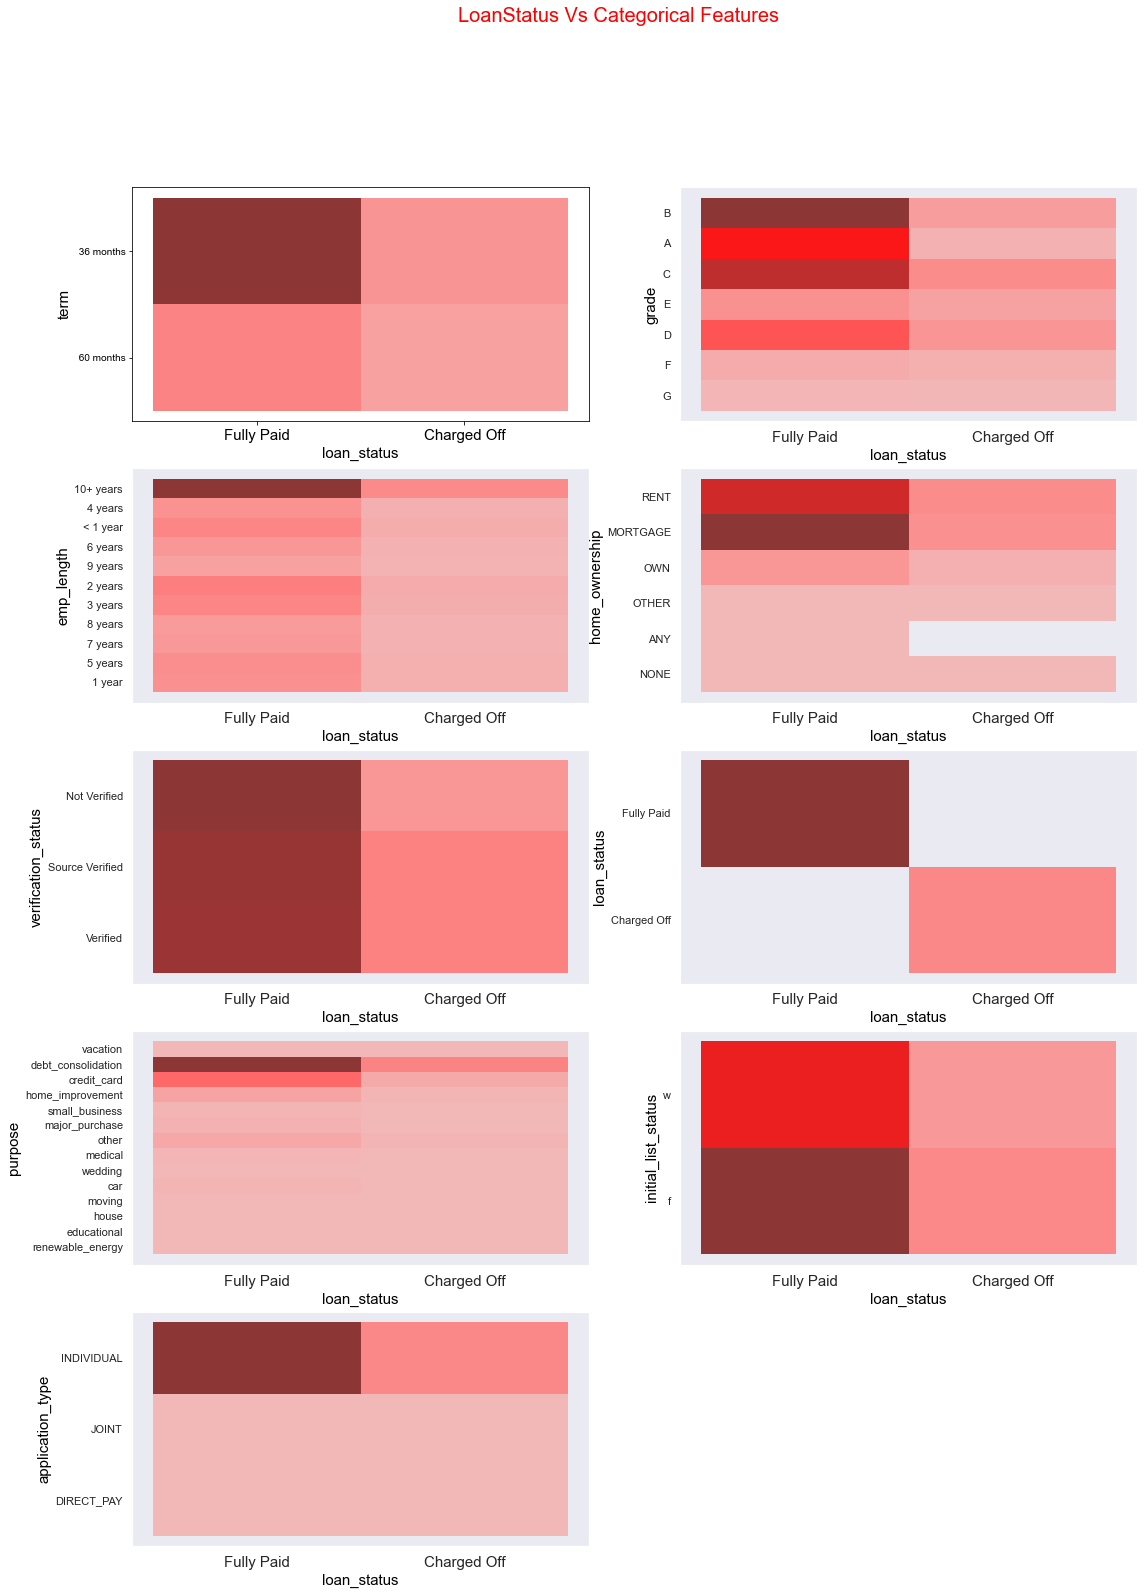

In [26]:
fig = plt.figure(figsize=(18,25))
for i,col in enumerate(sel_cat_cols):
    plt.subplot(int(len(sel_cat_cols)/2 +1), 2, i+1)
    sns.histplot(data= data, x= "loan_status", y= col, color = 'red')
    sns.set_theme(style='dark')
    plt.xlabel('loan_status', fontsize= 15, color = 'black')
    plt.ylabel(col,fontsize= 15, color = 'black')
    plt.xticks(fontsize = 15)

plt.suptitle("LoanStatus Vs Categorical Features",fontsize=20, color = 'red')
plt.show()

Insights:
    
    - Maximum number of Customers with 'application_type' INIDIVIDUAL had paid the loan fully.
    - Maximum number of customers with 'purpose' debt_consolidation had paid the loan fully.
    - Almost all the customers of all verification_types fully paid the loan.
    - Maximum number of customers with 'home_ownership' mortgage had paid the loan fully.
    - Maximum number of customers with 'emp_lenght' >10 years had paid the loan fully.
    - Maximum number of customers with 'term' 36 months had paid the loan fully.
    - Maximum number of customers with 'grade' B had paid the loan fully.

In [27]:
pd.crosstab(data['loan_status'],data['grade'], normalize='columns',margins= True,
            margins_name = 'Fraction').round(2)

grade,A,B,C,D,E,F,G,Fraction
loan_status,,,,,,,,
Charged Off,0.06,0.12,0.21,0.28,0.37,0.43,0.48,0.19
Fully Paid,0.94,0.88,0.79,0.72,0.63,0.57,0.52,0.81


### CORRELATION

In [28]:
#Heat map for correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, cmap = 'mako', linewidths = 0.1, square= True, linecolor = 'Black')
plt.yticks(rotation=0)
plt.title("Correlation between features", fontsize= 15)
plt.show()

ValueError: could not convert string to float: ' 36 months'

<Figure size 720x720 with 0 Axes>

Insights:
    
    The features loan_amnt and installment are more positively correlated with 95% . 
    pub_rec and pub_rec_bankruptcies are correlated only by 70%.
    total_acc and open_acc are 68% correlated.
    

In [29]:
#correlation using spearmsmans corr coeff
for col in num_cols:
    val = np.corrcoef(data[col].rank(), data['loan_status'].rank())[0,1]
    if val> 0 :
        print('There is +ve relation between loan_status and', col,"- corrcoef: ",np.round(val,2))
    if val == 0:
        print('There is no relation between loan_status and ', col,"- corrcoef: ",np.round(val,2))
    if val< 0:
        print('There is -ve relation between loan_status and ', col,"- corrcoef: ",np.round(val,2))

There is -ve relation between loan_status and  loan_amnt - corrcoef:  -0.07
There is -ve relation between loan_status and  int_rate - corrcoef:  -0.25
There is -ve relation between loan_status and  installment - corrcoef:  -0.05
There is +ve relation between loan_status and annual_inc - corrcoef:  0.08
There is -ve relation between loan_status and  dti - corrcoef:  -0.13
There is -ve relation between loan_status and  open_acc - corrcoef:  -0.03
There is -ve relation between loan_status and  pub_rec - corrcoef:  -0.02
There is -ve relation between loan_status and  revol_bal - corrcoef:  -0.0
There is -ve relation between loan_status and  revol_util - corrcoef:  -0.08
There is +ve relation between loan_status and total_acc - corrcoef:  0.02
There is +ve relation between loan_status and mort_acc - corrcoef:  0.08
There is -ve relation between loan_status and  pub_rec_bankruptcies - corrcoef:  -0.01


### OUTLIER DETECTION AND TREATMENT

In [30]:
data.duplicated().sum()

0

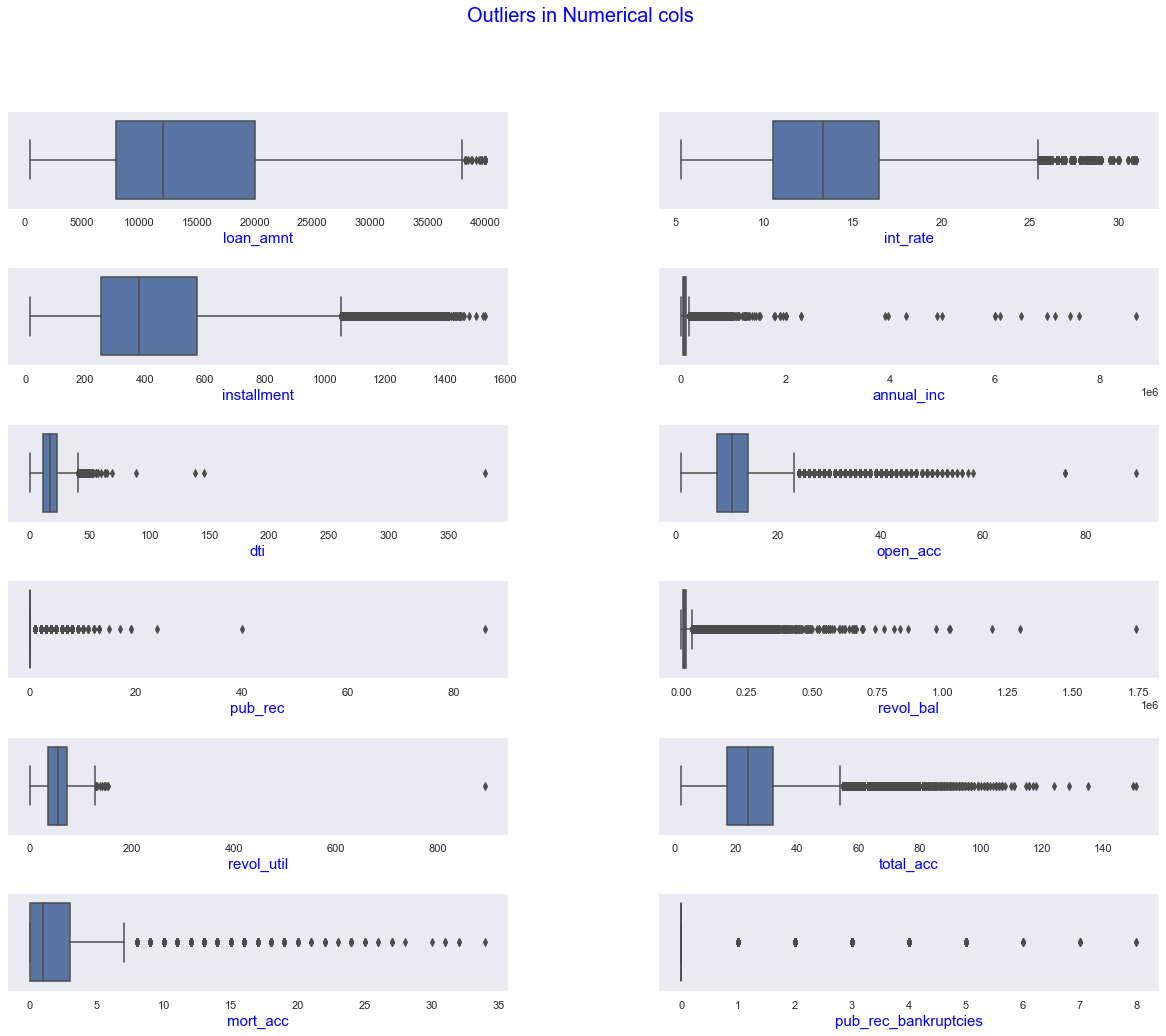

In [31]:
#Outlier detection on numerical features
fig = plt.figure(figsize=(20,18))
for i,col in enumerate(num_cols):
    plt.subplot(int(len(num_cols)/2 +1), 2, i+1)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.6)
    sns.boxplot(x=data[col] )
    plt.xlabel(col,fontsize =15, color = 'blue')
    #plt.ylabel("count of bikes", fontsize = 15, color = 'blue')
fig.suptitle("Outliers in Numerical cols ", fontsize= 20, color = 'blue')
plt.show()

Insights:
      
        From the above boxplot we can say that there are outliers in all the numerical features.

In [32]:
# IQR based outlier detection
def iqr_outliers(col):
  q1 = np.percentile(col, 25)
  q3 = np.percentile(col, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = [i for i, value in enumerate(col) if value < lower_bound or value > upper_bound]
  return outliers

In [33]:
outliers= {}
print("Outliers in the data:\n")
for col in num_cols:
    outliers[col] = iqr_outliers(data[col])
    print(f'There are {round((len(outliers[col])/data.shape[0])*100,2)}% in "{col}"')

Outliers in the data:

There are 0.05% in "loan_amnt"
There are 0.95% in "int_rate"
There are 2.77% in "installment"
There are 4.42% in "annual_inc"
There are 0.06% in "dti"
There are 2.65% in "open_acc"
There are 14.13% in "pub_rec"
There are 5.35% in "revol_bal"
There are 0.0% in "revol_util"
There are 2.16% in "total_acc"
There are 1.72% in "mort_acc"
There are 10.98% in "pub_rec_bankruptcies"


In [34]:
#outlier treatment: minimizing outliers by setting upperand lower limits as mean+/-std
for col in num_cols:
    mean=data[col].mean()
    std=data[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    data=data[(data[col]<upper_limit) & (data[col]>lower_limit)]
    
data.shape

(344054, 27)

Insights:
    
    From the above method 5% of data has been discarded considering them as potential outliers.

## Feature Engineering & Data Preprocessing

### ENCODING

For encoding a feature let us first check the no of unique values in each category. 
This will help us choosing the type of encoding to be applied.

There are total 24 features in our data.

    - 'loan_status' is target feature.
    - Categorical columns: 
    ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
     'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 
     'address']
    - Numerical columns:
    ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 
     'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
   
   Out of these following are the required fields based on the feature description:
           term,int_rate,installment,gradeemp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status, application_type,mort_acc ,pub_rec_bankruptcies

    Below are the features that can be discarded:
    
        sub_grade, emp_length, issue_d, title,earliest_cr_line,Address

Let us extract zipcode from address begore dropping address column.

In [35]:
data['address'].sample(5)

107424      58605 Campbell Shoal\r\nAlexandraberg, MO 29597
133804    2828 Diane Street Apt. 915\r\nJessicaview, MI ...
284329    17578 Wallace Mountains\r\nNorth Kimberlyborou...
234883    2335 Heather Courts Suite 308\r\nLake Thomasto...
167857             5321 Shawn Wells\r\nNicolebury, CA 70466
Name: address, dtype: object

In [36]:
# Deriving zip code and state from address
data['zip_code'] = data['address'].apply(lambda x: pd.Series(x[-5:]))

In [37]:
#dropping unwanted columns
data.drop(columns=['sub_grade','emp_title','emp_length', 'issue_d', 'title','earliest_cr_line','address'], axis=1, 
          inplace=True)

In [38]:
#Since there are only 10 zipcodes, we can change the datatype of zipcodes to categorical
data['zip_code'] = data['zip_code'].astype('object')

In [39]:
#updated cat_cols and num_cols
cat_cols = list(data.columns[(data.dtypes=='object') & (data.columns!='loan_status')])
cat_cols

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'zip_code']

In [40]:
for col in cat_cols:
    print(col,":",data[col].nunique(), data[col].unique())

term : 2 [' 36 months' ' 60 months']
grade : 7 ['B' 'A' 'C' 'E' 'D' 'F' 'G']
home_ownership : 6 ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE']
verification_status : 3 ['Not Verified' 'Source Verified' 'Verified']
purpose : 14 ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
initial_list_status : 2 ['w' 'f']
application_type : 3 ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
zip_code : 10 ['22690' '05113' '00813' '11650' '30723' '70466' '29597' '48052' '86630'
 '93700']


### Creation of Flags

If value greater than 1.0 then 1 else 0. This can be done on:

1. pub_rec
2. mort_acc
3. pub_rec_bankruptcies

In [41]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [42]:
data['pub_rec']=data.pub_rec.apply(pub_rec)
data['mort_acc']=data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies']=data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [43]:
#categorical columns encoding

# Converting term values to numerical val
term_values={' 36 months': 36, ' 60 months':60}
data['term'] = data.term.map(term_values)

# Mapping the target variable
data['loan_status']=data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

# Initial List Status
list_status = {'w': 0, 'f': 1}
data['initial_list_status'] = data.initial_list_status.map(list_status)


In [44]:
data.select_dtypes('object').columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'zip_code'],
      dtype='object')

In [45]:
data.select_dtypes('object').columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'zip_code'],
      dtype='object')

In [62]:
data.shape

(344054, 21)

In [64]:
for col in list(data.columns):
    print(col,':',data[col][0])

loan_amnt : 10000.0
term : 36
int_rate : 11.44
installment : 329.48
grade : B
home_ownership : RENT
annual_inc : 117000.0
verification_status : Not Verified
loan_status : 0
purpose : vacation
dti : 26.24
open_acc : 16.0
pub_rec : 0
revol_bal : 36369.0
revol_util : 41.8
total_acc : 25.0
initial_list_status : 0
application_type : INDIVIDUAL
mort_acc : 0
pub_rec_bankruptcies : 0
zip_code : 22690


In [61]:
data.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,0,vacation,...,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0,0,22690
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,...,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1,0,05113
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,0,credit_card,...,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0,0,05113
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,0,credit_card,...,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0,0,00813
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,1,credit_card,...,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,1,0,11650


In [57]:
#implementing one-hot encoding for categorical columns
cat_cols_en = data.select_dtypes('object').columns

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[cat_cols_en])

import pickle
with open('encoder_object.pickle','wb') as file:
    pickle.dump(encoder,file)
    
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols_en))
data_en = pd.concat([data,encoded_df], axis=1)
data_en.drop(columns=cat_cols_en, inplace=True)
data_en.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36.0,11.44,329.48,117000.0,0.0,26.24,16.0,0.0,36369.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36.0,11.99,265.68,65000.0,0.0,22.05,17.0,0.0,20131.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36.0,10.49,506.97,43057.0,0.0,12.79,13.0,0.0,11987.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36.0,6.49,220.65,54000.0,0.0,2.60,6.0,0.0,5472.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60.0,17.27,609.33,55000.0,1.0,33.95,13.0,0.0,24584.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data_en.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_DIRECT_PAY',
       'application_type_INDIVIDUAL', 

In [48]:
data_en.dropna(inplace=True)

In [49]:
data_en.isna().sum().sum()

0

In [50]:
X = data_en.drop(columns=['loan_status'])
X.reset_index(inplace=True, drop=True)
y = data_en['loan_status']
y.reset_index(drop=True, inplace=True)

In [51]:
y= data_en['loan_status']
data_en.drop(columns='loan_status', axis=1, inplace = True)
X = data_en

## Logistic Regression Modelling

In [52]:
#Splitting data to test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape

(239144, 57)

In [58]:
#Scaling data using minmax scaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

import pickle
with open('scaler_object.pickle','wb') as file:
    pickle.dump(scaler,file)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

SMOTE, or Synthetic Minority Oversampling Technique, is a technique used in machine learning to address the issue of class imbalance in datasets. Class imbalance occurs when one class (the minority class) has significantly fewer instances compared to other classes (the majority class). 
SMOTE addresses class imbalance by oversampling the minority class. However, unlike simple oversampling (which simply duplicates existing minority class examples), SMOTE generates synthetic data points for the minority class.

In [54]:
# Oversampling to balance the target variable

sm=SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 46054
Before OverSampling, count of label 0: 193090
After OverSampling, count of label 1: 193090
After OverSampling, count of label 0: 193090


Train Accuracy : 0.81
Train F1 Score: 0.12
Train Recall Score: 0.07
Train Precision Score: 0.53

Test Accuracy : 0.81
Test F1 Score: 0.12
Test Recall Score: 0.07
Test Precision Score: 0.51


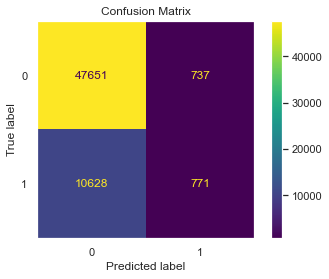

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

import pickle
with open('log_ress_model.pickle','wb') as file:
    pickle.dump(model,file)

#Model Evaluation
print('Train Accuracy :', model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     48388
         1.0       0.51      0.07      0.12     11399

    accuracy                           0.81     59787
   macro avg       0.66      0.53      0.51     59787
weighted avg       0.76      0.81      0.75     59787



In [ ]:
print("Model Coefficents:\n",'-'*15)
for i,col in enumerate(data_en.columns):
    print(col,":",round(model.coef_[0][i],3))


Model Coefficents:
 ---------------
loan_amnt : -0.006
term : 0.582
int_rate : 2.125
installment : 0.466
annual_inc : -1.14
dti : 1.036
open_acc : 0.643
pub_rec : 0.276
revol_bal : -0.499
revol_util : 0.45
total_acc : -0.553
initial_list_status : -0.034
mort_acc : -0.231
pub_rec_bankruptcies : -0.253
grade_A : -0.159
grade_B : -0.147
grade_C : -0.168
grade_D : -0.147
grade_E : -0.145
grade_F : -0.139
grade_G : -0.217
home_ownership_ANY : -0.039
home_ownership_MORTGAGE : -0.276
home_ownership_NONE : 0.035
home_ownership_OTHER : -0.32
home_ownership_OWN : -0.267
home_ownership_RENT : -0.255
verification_status_Not Verified : -0.358
verification_status_Source Verified : -0.391
verification_status_Verified : -0.373
purpose_car : -0.039
purpose_credit_card : -0.047
purpose_debt_consolidation : -0.058
purpose_educational : -0.081
purpose_home_improvement : -0.081
purpose_house : -0.008
purpose_major_purchase : -0.063
purpose_medical : -0.016
purpose_moving : -0.178
purpose_other : -0.103
pur

In [ ]:
print("model intercept: ", model.intercept_)

model intercept:  [-1.21717848]


## Feature Importance

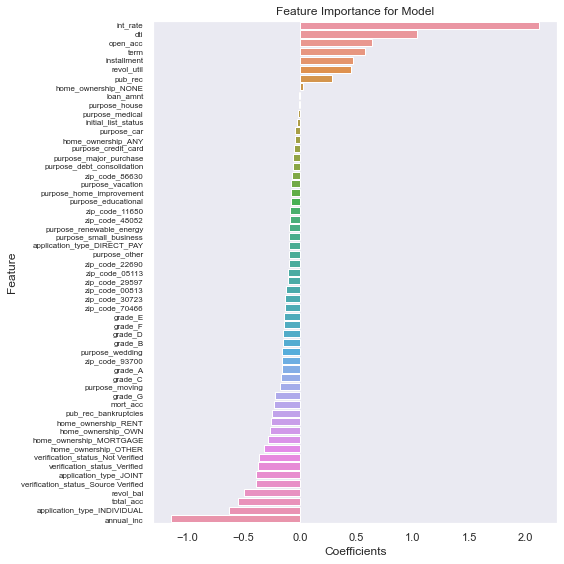

In [ ]:
feature_imp = pd.DataFrame({'Columns':X_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## ROC Curve & AUC

ROC AUC stands for Receiver Operating Characteristic Area Under the Curve. 

ROC AUC score is a single number that summarizes the classifier's performance across all possible classification thresholds.

ROC AUC score shows how well the classifier distinguishes positive and negative classes. It can take values from 0 to 1.

A higher ROC AUC indicates better performance. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.

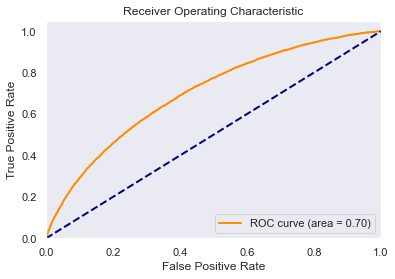

In [ ]:
# Predict probabilities for the test set
probs = model.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Insights:
    
    Model has area under ROC 70% which indicates it as a decent model, however the score can be improved by 
    hyperparameter tunning and training a better model.

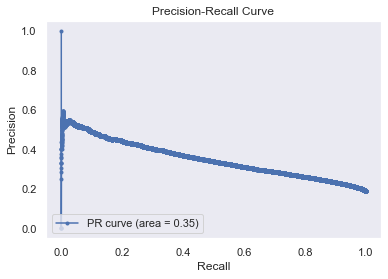

In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Insights:
    
    Precision-recall area is 0.35 which means its not a good value and there is a lot of scope for improvement in the model.

## Tradeoff Questions:

#### How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it ?

An oversampling technique SMOTE is used to reduce imbalance and false positives in the data.
For better performance of the model we can try various hyperparameter tunning.

#### Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone ?

Yes. LoanTap should not disburse loans to everyone.

There are many non-verified customers in the data. Every customer applying for loan should be verified 
either by company internally or by a third-party to identify the correct persons. 

From data provided, 20% of people default on their loan, which inturn become NPAs for the company.